424. Longest Repeating Character Replacement

You are given a string s and an integer k. You can choose any character of the string and change it to any other uppercase English character. You can perform this operation at most k times.

Return the length of the longest substring containing the same letter you can get after performing the above operations.

 

Example 1:

Input: s = "ABAB", k = 2
Output: 4
Explanation: Replace the two 'A's with two 'B's or vice versa.
Example 2:

Input: s = "AABABBA", k = 1
Output: 4
Explanation: Replace the one 'A' in the middle with 'B' and form "AABBBBA".
The substring "BBBB" has the longest repeating letters, which is 4.
There may exists other ways to achieve this answer too.
 

Constraints:

1 <= s.length <= 105
s consists of only uppercase English letters.
0 <= k <= s.length

In [4]:
from collections import defaultdict
class Solution:
    def characterReplacement(self, s: str, k: int) -> int:
        
        maxWindow = 0
        l = 0
        hm = defaultdict(int)
        for r in range(len(s)):
            hm[s[r]] += 1
            while r-l+1 - max(hm.values()) > k: 
                hm[s[l]] -= 1
                l+=1
            maxWindow = max(r-l+1,maxWindow)
        return maxWindow

Solution().characterReplacement("ABBA",1)


3

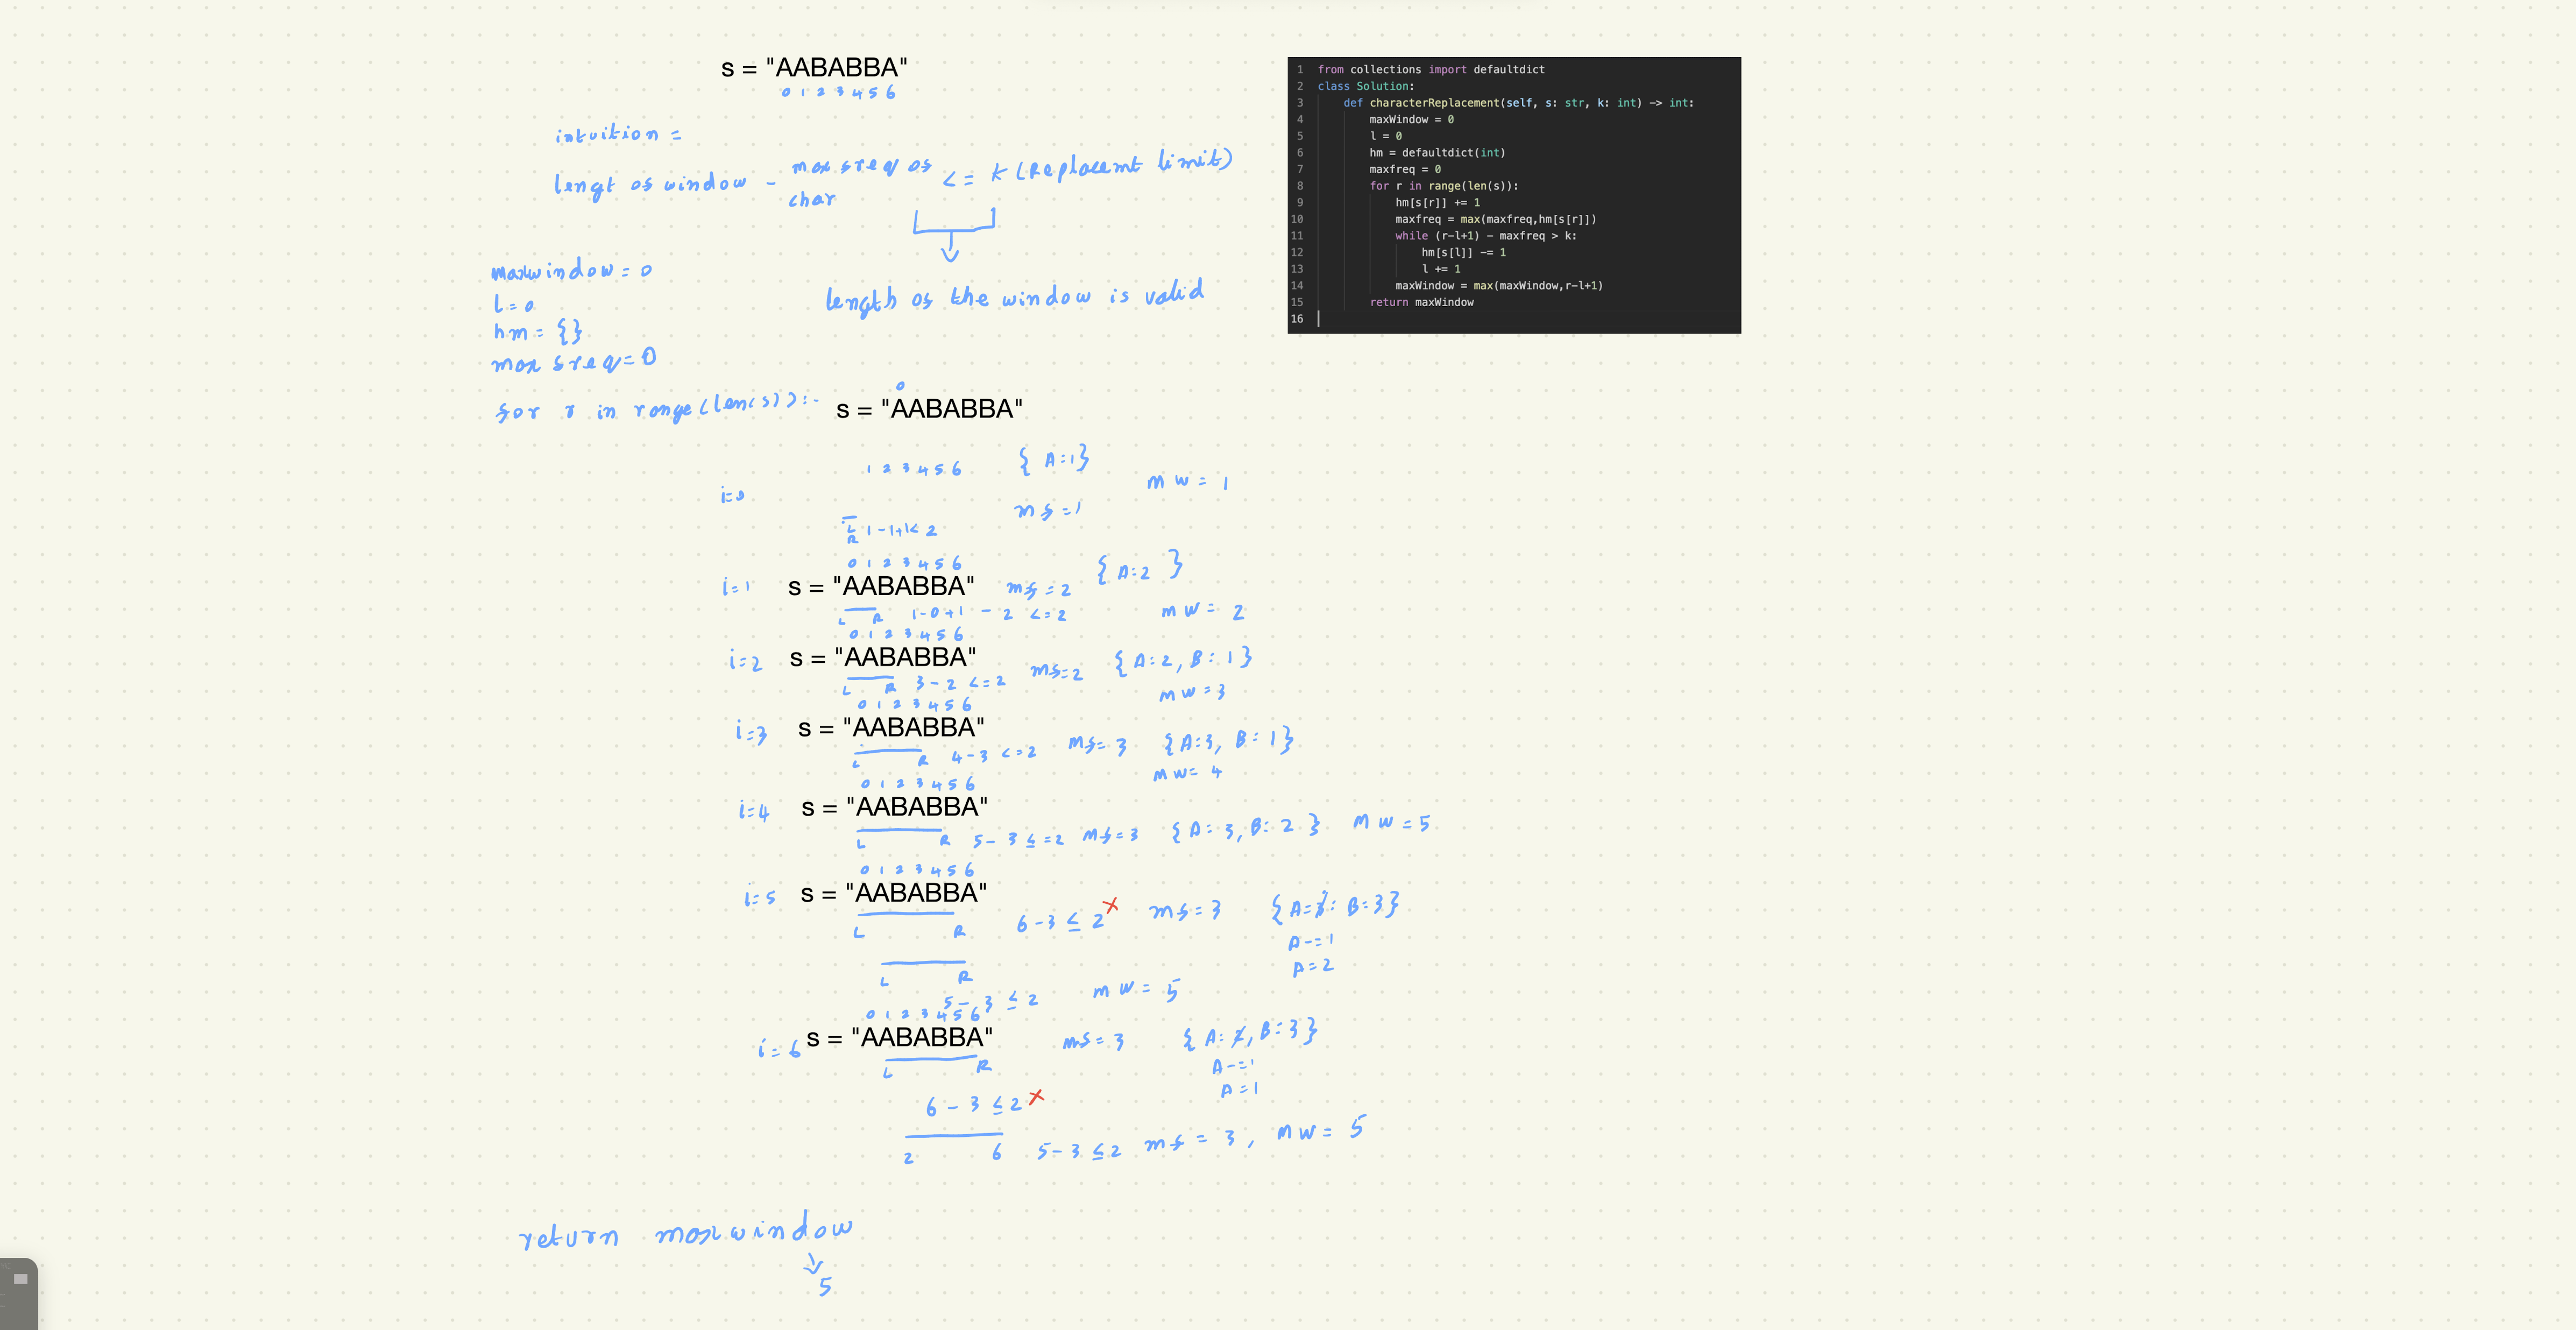

In [2]:
"""
the requirement is to return maximum length of substring of same char that can be formed by replacing k indx's chars

the intution that in a given window, when we reduce the maximum occurance of a single char from window char count, we will be left with count of 
char's that diffrent from max occurence char, if the the count is within limit we can expand our window,
else we can try shrinking window from left hand side to see if that window is eligible and move forward

else if not further windows are greter that the once that we encountered, we will return the max window size
which is having maximum occurence of same char and exactly k replacable chars.
"""

from collections import defaultdict
class Solution:
    def characterReplacement(self, s: str, k: int) -> int:
        
        maxWindow = 0
        l = 0
        maxFreq = 0
        hm = defaultdict(int)
        for r in range(len(s)):
            hm[s[r]] += 1
            maxFreq = max(maxFreq,hm[s[r]])
            while r-l+1 - maxFreq > k: 
                hm[s[l]] -= 1
                l+=1
            maxWindow = max(r-l+1,maxWindow)
        return maxWindow

Solution().characterReplacement("ABBA",1)

3

This is one of the most common and insightful questions regarding this algorithm. It touches on why this solution is $O(n)$ rather than $O(26n)$.The Short AnswerWe don't need to decrement maxf because shrinking the window cannot improve our result. We only care about maxf when it's growing, because only a new, larger maxf can lead to a new, larger res (maximum length).The Intuition: "Record-Breaking" FrequencyThe core of the "Longest Repeating Character Replacement" problem is this formula:$$\text{Window Length} - \text{Max Frequency} \leq k$$maxf represents the count of the "dominant" character in the window.(r - l + 1) - maxf represents the number of "other" characters we must change to make the whole window uniform.Why we don't update maxf when l moves:Our goal is the MAXIMUM length. To get a length larger than our current res, we would need a maxf that is even higher than the highest maxf we've seen so far.If we decrement a character count and the "true" maximum frequency in the window drops, the (r - l + 1) - maxf calculation remains "invalid" or "unproductive" for a while.Essentially, maxf acts as a historical record of the largest frequency we've encountered. Even if the current window has a lower frequency, our res won't improve until we find a character that appears more times than the historical maxf.